<a href="https://colab.research.google.com/github/BrayNarvi/ARIMA/blob/main/%D0%9A%D0%BD%D0%B8%D0%B3%D0%B0_ARIMA_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B9_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Устанавливаем библиотеку pmdarima в Colab

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.0 MB/s eta 0:00:00


#Устанавливаем библиотеку statsmodels в Colab

In [ ]:
!pip install statsmodels

#Импортируем библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Теперь задаем данные для прогноза, берем данные из Яндекс.Вордстат

In [ ]:
# Создаем DataFrame из предоставленных данных
data = {
    'Период': [
        'февраль 2022', 'март 2022', 'апрель 2022', 'май 2022', 'июнь 2022',
        'июль 2022', 'август 2022', 'сентябрь 2022', 'октябрь 2022', 'ноябрь 2022',
        'декабрь 2022', 'январь 2023', 'февраль 2023', 'март 2023', 'апрель 2023',
        'май 2023', 'июнь 2023', 'июль 2023', 'август 2023', 'сентябрь 2023',
        'октябрь 2023', 'ноябрь 2023', 'декабрь 2023', 'январь 2024'
    ],
    'Число запросов': [
        93075, 87171, 73510, 71260, 65263,
        69453, 74285, 105472, 127480, 174382,
        122724, 117438, 92277, 91291, 63133,
        56414, 51961, 49480, 61993, 66098,
        108766, 106576, 78193, 85181
    ]
}
df = pd.DataFrame(data)

#Ниже немного визуализации, чтобы посмотреть, что у нас за данные (можете не обращать внимания)

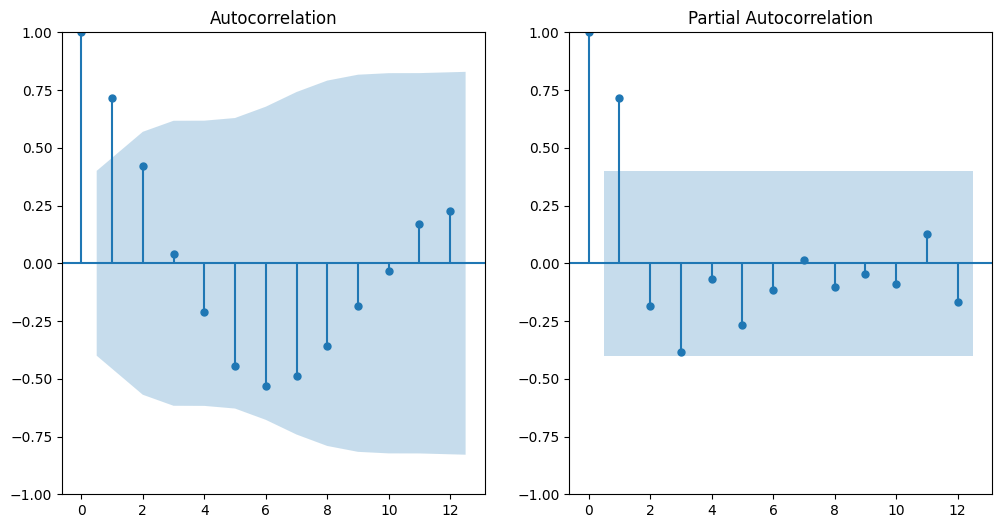

In [ ]:
# Преобразуем период в datetime и устанавливаем его в качестве индекса
df['Период'] = pd.to_datetime(df['Период'], format='%B %Y', errors='coerce')
df.set_index('Период', inplace=True)

# Визуализация ACF и PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(121)
plot_acf(df['Число запросов'], ax=plt.gca(), lags=12)

# PACF plot
plt.subplot(122)
plot_pacf(df['Число запросов'], ax=plt.gca(), lags=12)

plt.show()

#Выше мы видим явную сезонность на интервале 12 месяцев. Поэтому задаем эту сезонность ниже.

In [ ]:
# Мы можем видеть сезонность с периодом в 12 месяцев (годовая сезонность)
# Поэтому установим m=12
m = 12

#Приступаем к обучению модели

In [ ]:
#импортируем библиотеку придупрещдений и далее в ответе фильтруем разные алерты, чтобы они нам не мешали. Можете отключить и посмотреть, что будет.
import warnings
warnings.filterwarnings('ignore')

# Подбор параметров SARIMA модели
auto_model = auto_arima(df['Число запросов'], seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore')

# Обучим модель SARIMA с найденными параметрами
model = SARIMAX(df['Число запросов'], order=auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Сделаем прогноз на следующие 12 месяцев (год вперед)
forecast = model.get_forecast(steps=12)
pred = forecast.predicted_mean

# Создаем новый DataFrame для прогноза
forecast_df = pd.DataFrame({'Период': range(1, 13), 'Число запросов': pred.values})

print(forecast_df)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=555.404, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=564.377, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=549.751, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=559.142, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=618.583, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=549.858, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=551.507, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=551.233, Time=0.11 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=549.343, Time=0.17 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=551.170, Time=0.32 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=553.145, Time=0.18 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=564.223, Time=0.06 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=551.296, Time=0.10 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=551.818, Time=0.07 sec
 ARIMA(2,0,1)(0,0,1)[12] intercep

    Число запросов  Период
0     93075.000000     NaN
1     87171.000000     NaN
2     73510.000000     NaN
3     71260.000000     NaN
4     65263.000000     NaN
5     69453.000000     NaN
6     74285.000000     NaN
7    105472.000000     NaN
8    127480.000000     NaN
9    174382.000000     NaN
10   122724.000000     NaN
11   117438.000000     NaN
12    92277.000000     NaN
13    91291.000000     NaN
14    63133.000000     NaN
15    56414.000000     NaN
16    51961.000000     NaN
17    49480.000000     NaN
18    61993.000000     NaN
19    66098.000000     NaN
20   108766.000000     NaN
21   106576.000000     NaN
22    78193.000000     NaN
23    85181.000000     NaN
24    72413.970575     1.0
25    70671.415705     2.0
26    58196.648472     3.0
27    53520.279440     4.0
28    50632.582368     5.0
29    46996.572055     6.0
30    50099.824885     7.0
31    44997.381064     8.0
32    58902.760627     9.0
33    48470.132313    10.0
34    43334.555229    11.0
35    46196.102006    12.0


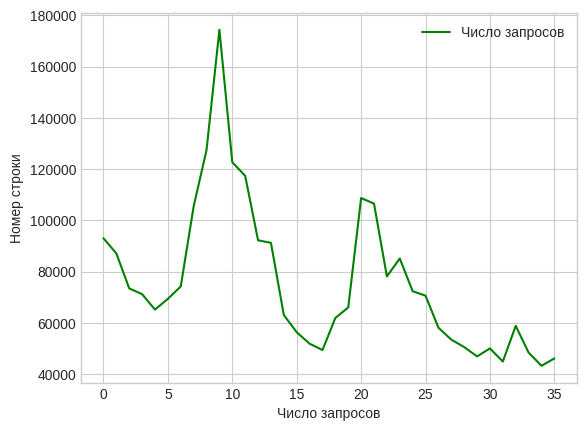

In [ ]:
# Объединяем исходные данные и прогноз в один DataFrame
df_with_forecast = df.append(forecast_df, ignore_index=True)

# Выводим значения DataFrame
print(df_with_forecast)

# Устанавливаем стиль графика
plt.style.use('seaborn-whitegrid')

# Создаем график
ax = df_with_forecast['Число запросов'].plot(style='-', color='green')

# Добавляем легенду и подписываем оси
plt.legend(loc='best')
plt.xlabel('Число запросов')
plt.ylabel('Номер строки')

# Показываем график
plt.show()